# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the pandas documentation to find functions or methods you might not have used yet, or ask questions on Stack Overflow and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

# Question 1 (20%)
Load the energy data from the file Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of energy.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

Rename the following list of countries (for use in later questions):

"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,

e.g.

'Bolivia (Plurinational State of)' should be 'Bolivia',

'Switzerland17' should be 'Switzerland'.



Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"



Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries

In [1]:
import pandas as pd
import numpy as np


In [2]:
def answer_one():
    # Load the energy data from the file Energy Indicators.xls, 
    # which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013,
    # and should be put into a DataFrame with the variable name of energy.
    energy= pd.read_excel('Energy Indicators.xls')

    # The first two columns are unneccessary, so you should get rid of them
    energy = energy.drop(energy.columns[:2], axis=1)

    # you should change the column labels so that the columns are:
    # ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

    cols = list(energy.iloc[8].values)
    energy.columns = cols

    #  Also, make sure to exclude the footer and header information from the datafile.
    energy = energy[17:244]

    # For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.
    energy = energy.replace('...', np.NaN)

    # Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule)
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000

    # There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,
    # e.g.
    # 'Bolivia (Plurinational State of)' should be 'Bolivia',
    # 'Switzerland17' should be 'Switzerland'.

    def func(x):
        alpha_num = [z for z in x]
        nums = '0,1,2,3,4,5,6,7,8,9'.split(',')
        list_ = []
        for i in alpha_num:
            if i not in nums:
                list_.append(i)
        return ''.join(list_)

    energy['Country'] = energy['Country'].apply(func)

    energy['Country'] = energy['Country'].apply(lambda x:x.split('(')[0])
    energy['Country'] = energy['Country'].str.strip()
    # Rename the following list of countries (for use in later questions):
    countries_changed= {"Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}

    energy['Country'] = energy['Country'].replace(countries_changed)

    # Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 
    # from World Bank. Call this DataFrame GDP. Make sure to skip the header

    GDP = pd.read_csv('world_bank.csv')

    cols = list(GDP.iloc[3].values)

    # Make sure to skip the header
    GDP = GDP[4:]

    GDP.columns = cols

    # rename the following list of countries
    countries_changed= {"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}

    GDP['Country Name'] = GDP['Country Name'].replace(countries_changed)

    GDP = GDP.rename(columns = {'Country Name': 'Country'})

    # Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology 
    # from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area.
    # Call this DataFrame ScimEn.
    ScimEn = pd.read_excel('scimagojr-3.xlsx')

    # Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). 
    # Use only the last 10 years (2006-2015) of GDP data 
    # and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

    # The index of this DataFrame should be the name of the country, and the columns should be 
    # ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 
    # 'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
    # '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

    GDP_06_15 = pd.concat([GDP['Country'], GDP.iloc[:, -10:]],axis=1)


    top_15_countries = ScimEn.iloc[:15]

    final_ = pd.merge(pd.merge(top_15_countries,energy,  on='Country'),GDP_06_15 , on='Country').set_index('Country')
    final_ = final_.rename(columns = {'Renewable Electricity Production': '% Renewable'})
    return final_

In [3]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per capita,% Renewable,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


# Q2

In [4]:
def answer_two():
    energy= pd.read_excel('Energy Indicators.xls')

        # The first two columns are unneccessary, so you should get rid of them
    energy = energy.drop(energy.columns[:2], axis=1)

        # you should change the column labels so that the columns are:
        # ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

    cols = list(energy.iloc[8].values)
    energy.columns = cols

        #  Also, make sure to exclude the footer and header information from the datafile.
    energy = energy[17:244]

        # For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.
    energy = energy.replace('...', np.NaN)

        # Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule)
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000

        # There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,
        # e.g.
        # 'Bolivia (Plurinational State of)' should be 'Bolivia',
        # 'Switzerland17' should be 'Switzerland'.

    def func(x):
        alpha_num = [z for z in x]
        nums = '0,1,2,3,4,5,6,7,8,9'.split(',')
        list_ = []
        for i in alpha_num:
            if i not in nums:
                list_.append(i)
        return ''.join(list_)

    energy['Country'] = energy['Country'].apply(func)

    energy['Country'] = energy['Country'].apply(lambda x:x.split('(')[0])
    energy['Country'] = energy['Country'].str.strip()
        # Rename the following list of countries (for use in later questions):
    countries_changed= {"Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}

    energy['Country'] = energy['Country'].replace(countries_changed)

        # Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 
        # from World Bank. Call this DataFrame GDP. Make sure to skip the header

    GDP = pd.read_csv('world_bank.csv')

    cols = list(GDP.iloc[3].values)

        # Make sure to skip the header
    GDP = GDP[4:]

    GDP.columns = cols

        # rename the following list of countries
    countries_changed= {"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}

    GDP['Country Name'] = GDP['Country Name'].replace(countries_changed)

    GDP = GDP.rename(columns = {'Country Name': 'Country'})

        # Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology 
        # from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area.
        # Call this DataFrame ScimEn.
    ScimEn = pd.read_excel('scimagojr-3.xlsx')


    inner = len(pd.merge(pd.merge(ScimEn,energy,  on='Country'),GDP , on='Country').set_index('Country'))
    outer = len(pd.merge(pd.merge(ScimEn,energy,  on='Country', how='outer'),GDP , on='Country', how='outer').set_index('Country'))

    return outer - inner
answer_two()

156

# Q3

In [5]:
def answer_three():
    final_ = answer_one()
    return np.mean(final_.iloc[:,-10:], axis=1).sort_values(ascending=False)
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [6]:
def answer_four():
    final_ = answer_one()
    gdponly = final_.iloc[:,-10:]
    top_6 = answer_three().index[5]
    return gdponly.loc[top_6][-1] - gdponly.loc[top_6][0]  
answer_four()

246702696075.3999

In [7]:
def answer_five():
    final_ = answer_one()

    return np.mean(final_['Energy Supply per capita'])

answer_five()

157.6

In [8]:
def answer_six():
    final_ = answer_one()
    return (final_['% Renewable'].idxmax(), final_['% Renewable'].max())
answer_six()

('Brazil', 69.64803)

In [9]:
def answer_seven():
    final_ = answer_one()
    ratio = final_.iloc[:,3:5].apply(lambda x:x[1] / x[0],axis=1)
    return (ratio.idxmax(), ratio.max())
answer_seven()

('China', 0.6893126179389422)

In [10]:
def answer_eight():
    final_ = answer_one()
    ans = final_.iloc[:, 7:9].apply(lambda x: x[0] / x[1], axis=1).sort_values(ascending=False).index[2]
    return ans
answer_eight()

'United States'

In [11]:
def answer_nine():
    final_ = answer_one()
    final_['pop'] = final_['Citable documents'] / final_.iloc[:, 7:9].apply(lambda x: x[0] / x[1], axis=1)
    ans = final_[['pop', 'Energy Supply per capita']].corr()
    return ans.iloc[1][0]
answer_nine()

0.7940010435442943

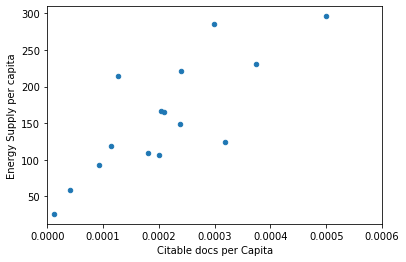

In [12]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per capita', kind='scatter', xlim=[0, 0.0006])
plot9()

In [13]:
def answer_ten():
    final_ = answer_one()
    median_ = final_['% Renewable'].median()    
    final_['HighRenew'] = (final_['% Renewable'] >= median_).astype('int')    
    return final_['HighRenew']
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int32

In [14]:
def answer_eleven():
    final_ = answer_one()
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}

    continents = final_.rename(index = ContinentDict)

    continents['PopEst'] = continents.iloc[:, 7:9].apply(lambda x: x[0] / x[1], axis=1)

    size = continents.groupby('Country').count().iloc[:,1]

    ans = pd.concat([size, continents.groupby('Country')['PopEst'].agg(['sum','mean', 'std'])],axis=1)

    ans = ans.rename(columns={'Documents': 'size'})
    return ans.reset_index().rename(columns={'Country': 'Continent'}).set_index('Continent')
answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [15]:
def answer_twelve():
    pass

In [16]:
def answer_thirteen():
    
    final_ = answer_one()

    popEst = final_.iloc[:,7:9].apply(lambda x: x[0] / x[1],axis=1)

    lst_=[]
    for i in popEst:
        lst_.append('{0:,.2f}'.format(i))

    return pd.Series(lst_, index = final_.index)
answer_thirteen()
    

Country
China                 1,367,645,161.29
United States           317,615,384.62
Japan                   127,409,395.97
United Kingdom           63,870,967.74
Russian Federation      143,500,000.00
Canada                   35,239,864.86
Germany                  80,369,696.97
India                 1,276,730,769.23
France                   63,837,349.40
South Korea              49,805,429.86
Italy                    59,908,256.88
Spain                    46,443,396.23
Iran                     77,075,630.25
Australia                23,316,017.32
Brazil                  205,915,254.24
dtype: object